<a href="https://colab.research.google.com/github/workwithjahan/-CAD_MAIA_skin-lesion-classifictaion/blob/main/eashrat_multiclass_allfeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text** Color Histogram Multi class





## Import Libraries

In [121]:
import numpy as np 
import matplotlib.pyplot as plt
from google.colab import drive
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from skimage.feature import local_binary_pattern
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from pathlib import Path
import xgboost as xgb
import lightgbm as lgb
from PIL import Image, ImageOps
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, recall_score, confusion_matrix


## Load Data

In [4]:
# This will prompt for authorization.
drive.mount('/content/drive')
# Define the root data directory
DATA_DIR = "/content/drive/MyDrive/dataset"

Mounted at /content/drive


In [5]:
SIZE = 224

In [120]:
import os

lst = os.listdir('/content/drive/MyDrive/dataset/hair_removed_9_kernel/train/bcc') # your directory path
number_files = len(lst)
print (number_files)

1335


In [122]:
def hist_features(img): 
  hist_blue = cv2.calcHist([img],[0],None,[256],[0,256]) #blue 
  hist_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
  hist_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
  hist=np.hstack([hist_green,hist_red,hist_blue]) 
  return hist.flatten()

In [60]:


from skimage import io, exposure, morphology, filters, color, \
                    segmentation, feature, measure, img_as_float, img_as_ubyte

LBP

In [124]:
def compute_lbp(arr):
  # LBP function params
  radius = 3
  n_points = 8 * radius
  n_bins = n_points + 2
  lbp = local_binary_pattern(arr,n_points,radius,'uniform')
  lbp = lbp.ravel()
  #feature_len = int(lbp.max() + 1)
  feature = np.zeros(n_bins)
  for i in lbp:
    feature[int(i)] += 1 # Feature
  feature /= np.linalg.norm(feature, ord=1) # Normalizing feature
  return feature

In [156]:
SIZE = 224
train_images_lbp = []
train_labels_lbp = [] 
train_hist=[]
train_image_glcm=[]

#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/drive/MyDrive/dataset/Multiclass/multi_train/*"): 
    label_lbp_train = directory_path.split("/")[-1]
    print(label_lbp_train)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #print(img_path)
       # img1 = cv2.imread(img_path,0) #Reading color images
        src = cv2.imread(os.path.join(img_path),0)
      
        imgv = cv2.cvtColor(src,cv2.COLOR_GRAY2BGR) #Reading color images
        imgv1 = cv2.cvtColor(imgv,cv2.COLOR_BGR2HSV)
        h, s, v = imgv1[:,:,0], imgv1[:,:,1], imgv1[:,:,2]
        hist_h = imgv1[:,:,0]
        img1 = cv2.resize(hist_h, (SIZE, SIZE)) #Resize images#glcm

       # im2=cv2.cvtColor(src,cv2.COLOR_BGR2GRAY) 
        img2=cv2.resize(src, (SIZE, SIZE))
        arr = np.array(img2) # convert the image to numpy array
        #lbp
        feature_train_lbp = compute_lbp(arr)
        train_images_lbp.append(feature_train_lbp)
        train_labels_lbp.append(label_lbp_train) #same label for glcm 

        #colorhist
        #img3 = cv2.resize(img3, (SIZE, SIZE)) #Resize images
        #fc=cv2.cvtColor(src, cv2.COLOR_GRAY2BGR )
        img3=hist_features(imgv) #call the function
        train_hist.append(img3)
        #train_label_hist.append(labelhist)

        #glcm
        train_image_glcm.append(img1)
        #train_label_glcm.append(label_glcm)
        #n=n+1
train_images_lbp =np.array(train_images_lbp)
trait_labels_lbp =np.array(train_labels_lbp)#same label for glcm 
train_hist=np.array(train_hist)
train_image_glcm=np.array(train_image_glcm)
#train_label_hist=np.array(train_label_hist)

mel
bcc
scc


val all

In [157]:

test_images_lbp = []
test_labels_lbp = [] 
test_hist=[]
#glcm
test_image_glcm=[]
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/drive/MyDrive/dataset/Multiclass/multi_val/*"): 
    label_lbp_test = directory_path.split("/")[-1]
    #print(label_lbp_test)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #print(img_path)
        #img2 = cv2.imread(img_path,0) #Reading color images
        #glcm
        src2 = cv2.imread(os.path.join(img_path),0)
        imgv1 = cv2.cvtColor(src2,cv2.COLOR_GRAY2BGR)
        img13 = cv2.cvtColor(imgv1,cv2.COLOR_BGR2HSV) #Reading color images
        h, s, v = img13[:,:,0], img13[:,:,1], img13[:,:,2]
        hist_h2 =img13[:,:,0]
        img2 = cv2.resize(hist_h2, (SIZE, SIZE))#glcm


       # f2=cv2.medianBlur(dst2,5)
        #Resize images
        img8=img2 = cv2.resize(src2, (SIZE, SIZE))
        arr = np.array(img8) # convert the image to numpy array
        feature_test = compute_lbp(arr) #lbp
        test_images_lbp.append(feature_test)
        test_labels_lbp.append(label_lbp_test)
        #colorhist

        #f2c=cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        img4=hist_features(imgv1)
        test_hist.append(img4)
        #test_label_hist.append(labelhist_test)
        test_image_glcm.append(img2)


test_images_lbp =np.array(test_images_lbp)
test_labels_lbp =np.array(test_labels_lbp)
test_hist = np.array(test_hist)
test_image_glcm =np.array(test_image_glcm)

GLCM

In [ ]:
def feature_extractor(dataset):
  image_dataset  = pd.DataFrame()
  distance = [11, 21]
  angle = [0, np.pi/4, np.pi/2, 3*np.pi/4]
  for image in range(dataset.shape[0]):
    img = dataset[image]
    df = pd.DataFrame()
    count = 1
    for dist in distance:
      for ang in angle:
        GLCM = greycomatrix(img, [dist], [ang])      
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df[f'Energy{count}'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df[f'Corr{count}'] = GLCM_corr             
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df[f'Homogen{count}'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df[f'Contrast{count}'] = GLCM_contr
        count = count + 1
    image_dataset = image_dataset.append(df)    
  return image_dataset

In [ ]:
train_feature_glcm=feature_extractor(train_image_glcm)
test_feature_glcm=feature_extractor(test_image_glcm)

## Label Encoding

In [91]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_label_hist)
test_labels_encoded = le.transform(test_label_hist)
le.fit(train_label_hist)
train_labels_encoded = le.transform(train_label_hist)

In [93]:
x_train, y_train, x_test, y_test = train_hist, train_labels_encoded, test_hist, test_labels_encoded

In [72]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [95]:
over=RandomOverSampler(random_state=0,sampling_strategy='minority')
X_res,Y_res=over.fit_resample(x_train,y_train)

In [96]:
print(sum(Y_res==0))

1993


In [97]:
over=RandomOverSampler(random_state=0,sampling_strategy='minority')
X_result,Y_result=over.fit_resample(X_res,Y_res)

In [98]:
print(sum(Y_result==1))

2713


In [99]:
print(sum(Y_result==0))

2713


In [100]:
print(sum(Y_result==2))

2713


## SVM

In [101]:
pipe1 = Pipeline([
                 ("scale", StandardScaler()),
                 ("classifier", SVC(class_weight='balanced', probability=True, kernel= 'rbf', gamma=0.01, C=100)) #radial basis function kernel
                 ])

In [103]:
pipe1.fit(X_result,Y_result)

Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 SVC(C=100, class_weight='balanced', gamma=0.01,
                     probability=True))])

Accuracy: 53.31%


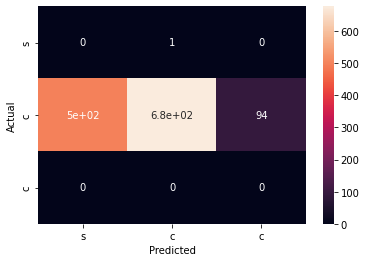

In [104]:
# Test set evaluation
prediction = pipe1.predict(x_test)
# Visualization
cmat = metrics.confusion_matrix(prediction,test_labels_encoded)
s = sns.heatmap(cmat,annot=True,xticklabels=label, yticklabels=label)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace() / cmat.sum()
print('Accuracy: {0:5.2f}%'.format(acc*100))

In [105]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(prediction, test_labels_encoded)
print(kappa)

-0.0014494295364484433


## Random Forest

In [106]:
pipe2 = Pipeline([
                 ("scale", StandardScaler()),
                 ("classifier", RandomForestClassifier(n_estimators = 400, random_state = 42))
                 ])

In [107]:
pipe2.fit(X_result,Y_result)

Pipeline(steps=[('scale', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(n_estimators=400, random_state=42))])

Accuracy: 51.42%


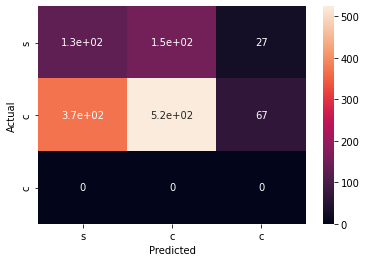

In [108]:
# Test set evaluation
prediction = pipe2.predict(x_test)
# Visualization
cmat = metrics.confusion_matrix(prediction,test_labels_encoded)
s = sns.heatmap(cmat,annot=True,xticklabels=label, yticklabels=label)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace() / cmat.sum()
print('Accuracy: {0:5.2f}%'.format(acc*100))

In [109]:
kappa = cohen_kappa_score(prediction, test_labels_encoded)
print(kappa)

0.029778118963894817


## KNN

In [110]:
pipe3 = Pipeline([
                 ("scale",StandardScaler()),
                 ("classifier", KNeighborsClassifier(n_neighbors=7))
                 ])

In [111]:
pipe3.fit(X_result,Y_result)

Pipeline(steps=[('scale', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])

Accuracy: 42.91%


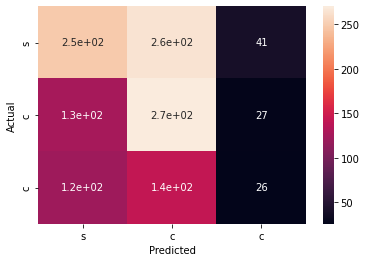

In [112]:
# Test set evaluation
prediction = pipe3.predict(x_test)
# Visualization
cmat = metrics.confusion_matrix(prediction,test_labels_encoded)
s = sns.heatmap(cmat,annot=True,xticklabels=label, yticklabels=label)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace() / cmat.sum()
print('Accuracy: {0:5.2f}%'.format(acc*100))

In [113]:
kappa = cohen_kappa_score(prediction, test_labels_encoded)
print(kappa)

0.09879179863832654


## AdaBoost

In [114]:
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(X_result,Y_result)

AdaBoostClassifier(n_estimators=200, random_state=0)

Accuracy: 65.67%


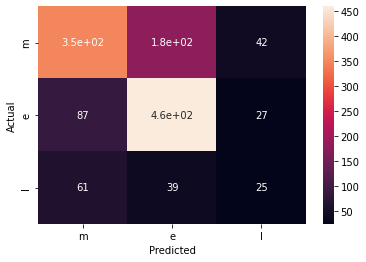

In [51]:
# Test set evaluation
prediction = clf.predict(x_test)
# Visualization
cmat = confusion_matrix(prediction,test_labels_encoded)
s = sns.heatmap(cmat,annot=True,xticklabels=label, yticklabels=label)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace() / cmat.sum()
print('Accuracy: {0:5.2f}%'.format(acc*100))

In [52]:
kappa = cohen_kappa_score(prediction, test_labels_encoded)
print(kappa)

0.4031903427462815


## XGB

In [53]:
mod1 = xgb.XGBClassifier(booster='dart',learning_rate=0.1,objective='multi:softmax')
train_arr = np.array(X_result)
test_arr = np.array(Y_result)
mod1.fit(train_arr, test_arr)

XGBClassifier(booster='dart', objective='multi:softprob')

In [54]:
prediction = mod1.predict(x_test)
print("Accuracy = ", accuracy_score(test_labels_encoded, prediction))

Accuracy =  0.6897637795275591


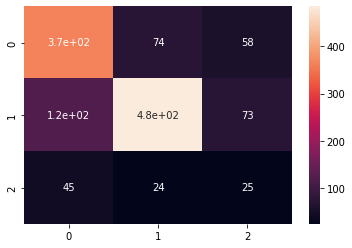

In [55]:
cm = confusion_matrix(test_labels_encoded, prediction)
sns.heatmap(cm, annot=True)

In [56]:
kappa = cohen_kappa_score(prediction, test_labels_encoded)
print(kappa)

0.46684368220738093


In [57]:
skf = StratifiedKFold(n_splits = 5)

In [58]:
# Defining a dictionary
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1, 1, 5, 10, 100], #Regularization parameter.
            'kernel': ['rbf','linear','sigmoid','poly'], 
            'gamma':[0.00001,0.0001,0.001,0.01,0.1,1]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [30,50,70,100] #Trees: may lead to overfitting if n_estimators is too much
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 5, 9, 15, 19, 23, 27, 31, 35, 39]
        }
    }
}

In [59]:
scores = []

for model_name, mp in model_params.items():
    grid =  GridSearchCV(estimator=mp['model'], 
                         param_grid=mp['params'], 
                         cv=skf, n_jobs=6, #five fold cross validation
                         return_train_score=False)
    
    grid.fit(X_result,Y_result)
    
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

print(df)

KeyboardInterrupt: ignored